In [1]:
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping,TensorBoard

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


data = np.array(data)
labels = np.array(labels)

# print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [2]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

model.build()
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [3]:
earlystop = EarlyStopping(monitor='val_loss',verbose=1,mode='min',patience=2)

tensorboard = TensorBoard(log_dir='log\\fit', 
                          histogram_freq=1,
                          write_graph=True, 
                          write_images=True, 
                          update_freq='epoch',
                          profile_batch=2,
                         embeddings_freq=1)


epochs = 12
model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),callbacks=[earlystop,tensorboard])

# model.save("final_traffic_classifier.h5")



Epoch 1/12
981/981 [==============================] - 71s 72ms/step - loss: 2.0611 - accuracy: 0.4459 - val_loss: 0.7662 - val_accuracy: 0.8137
Epoch 2/12
981/981 [==============================] - 77s 78ms/step - loss: 0.9017 - accuracy: 0.7327 - val_loss: 0.3687 - val_accuracy: 0.9061
Epoch 3/12
981/981 [==============================] - 77s 78ms/step - loss: 0.6625 - accuracy: 0.8030 - val_loss: 0.2305 - val_accuracy: 0.9379
Epoch 4/12
981/981 [==============================] - 80s 82ms/step - loss: 0.5677 - accuracy: 0.8301 - val_loss: 0.2949 - val_accuracy: 0.9211
Epoch 5/12
981/981 [==============================] - 76s 77ms/step - loss: 0.4823 - accuracy: 0.8561 - val_loss: 0.1984 - val_accuracy: 0.9475
Epoch 6/12
981/981 [==============================] - 77s 78ms/step - loss: 0.3994 - accuracy: 0.8811 - val_loss: 0.1436 - val_accuracy: 0.9605
Epoch 7/12
981/981 [==============================] - 74s 76ms/step - loss: 0.3513 - accuracy: 0.8976 - val_loss: 0.1108 - val_accuracy:

In [6]:
model.evaluate(X_test,y_test,verbose=0)

[0.08465878665447235, 0.9748788475990295]

In [7]:
from sklearn.metrics import classification_report

In [15]:
pred = model.predict(X_test)

246/246 [==============================] - 3s 11ms/step


In [34]:
prediction=[]

for i in pred:
    prediction.append(np.argmax(i))

In [35]:
prediction = to_categorical(prediction)

In [36]:
prediction

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        31
           1       0.97      0.97      0.97       497
           2       0.92      0.99      0.96       420
           3       0.99      0.96      0.97       289
           4       1.00      0.95      0.97       441
           5       0.94      0.94      0.94       363
           6       0.98      1.00      0.99        58
           7       0.94      0.95      0.95       275
           8       0.98      0.96      0.97       307
           9       0.99      1.00      0.99       267
          10       1.00      0.98      0.99       377
          11       0.98      0.95      0.96       243
          12       0.98      1.00      0.99       443
          13       0.99      0.99      0.99       455
          14       1.00      1.00      1.00       162
          15       1.00      0.98      0.99       122
          16       1.00      1.00      1.00        90
          17       1.00    

<AxesSubplot:>

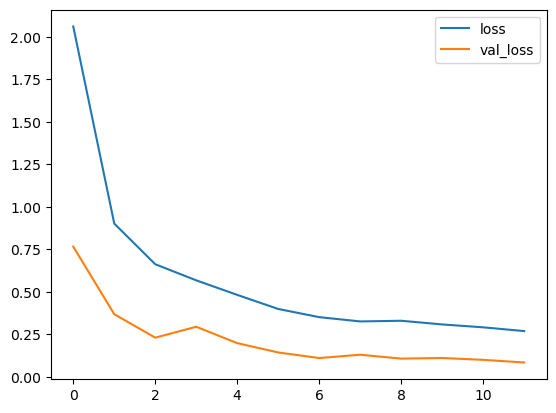

In [4]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss[['loss','val_loss']].plot()

<AxesSubplot:>

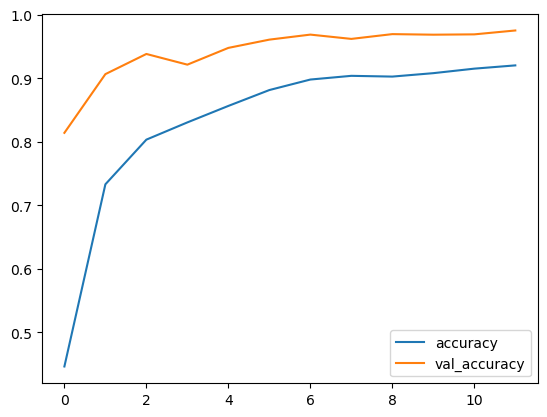

In [5]:
loss[['accuracy','val_accuracy']].plot()

In [2]:
#model.save('final_traffic_classifier.h5')
#model.save('traffic_ann2.h5')


In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('final_traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }
                 
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict([image])[0]
    pred = numpy.argmax(pred)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
   

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()


(1, 30, 30, 3)
1/1 [==============================] - 0s 106ms/step
Veh > 3.5 tons prohibited
